<a href="https://colab.research.google.com/github/DeisyData/BIT_IA_Bootcamp/blob/main/S11_C1_Classifier_Class.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
# Cargar librerías necesarias
import pandas as pd
import re
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Cargar datos
data = pd.read_csv('twitter.csv')

# Revisar columnas y estructura
print(data.head())

   id  label                                              tweet
0   1      0   @user when a father is dysfunctional and is s...
1   2      0  @user @user thanks for #lyft credit i can't us...
2   3      0                                bihday your majesty
3   4      0  #model   i love u take with u all the time in ...
4   5      0             factsguide: society now    #motivation


El label es la función objetivo:

*   0: positivo
*   1: negativo



# 1. Preprocessing

In [16]:
# Función para limpiar texto
def clean_text(text):
    text = re.sub(r'@[A-Za-z0-9_]+', '', text)  # Eliminar menciones
    text = re.sub(r'http\S+', '', text)         # Eliminar URLs
    text = re.sub(r'#', '', text)              # Eliminar hashtags
    text = re.sub(r'[^A-Za-z\s]', '', text)    # Eliminar caracteres especiales
    text = text.lower().strip()                # Convertir a minúsculas
    return text

data['clean_tweet'] = data['tweet'].apply(clean_text)

In [17]:
# Vectorizar usando TF-IDF
vectorizer = TfidfVectorizer(max_features=5000)

X = vectorizer.fit_transform(data['clean_tweet'])
y = data['label']

# 2. Train

In [18]:
# Dividir datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
# Entrenar un modelo de Regresión Logística
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

              precision    recall  f1-score   support

           0       0.95      1.00      0.97      5937
           1       0.91      0.32      0.47       456

    accuracy                           0.95      6393
   macro avg       0.93      0.66      0.72      6393
weighted avg       0.95      0.95      0.94      6393



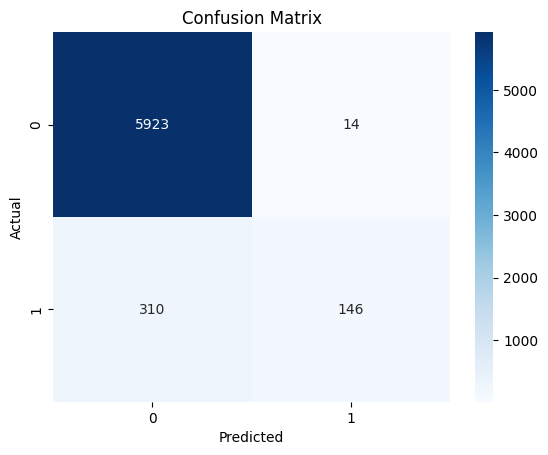

In [20]:
# Predicciones
y_pred = model.predict(X_test)

# Métricas
print(classification_report(y_test, y_pred))

# Matriz de confusión
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [21]:
data['tweet'].head(5)

,tweet
0,@user when a father is dysfunctional and is s...
1,@user @user thanks for #lyft credit i can't us...
2,bihday your majesty
3,#model i love u take with u all the time in ...
4,factsguide: society now #motivation


# 3. **Validation**

In [34]:
# Extraer las columnas relevantes
X = data['tweet']  # Texto de los tweets
y = data['label']  # Etiquetas de sentimiento

# Dividir en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Seleccionar 10 ejemplos aleatorios del conjunto de prueba
import random

sample_indices = random.sample(range(len(X_test)), 10)
sample_comments = X_test.iloc[sample_indices].tolist()
sample_labels = y_test.iloc[sample_indices].tolist()

# Crear un DataFrame para mostrar los comentarios seleccionados y sus etiquetas
sample_data = pd.DataFrame({'tweet': sample_comments, 'Label': sample_labels})
sample_data

,tweet,Label
0,â #united kingdom retail sales (mom) came i...,0
1,why's taylor mccaw a cow ?? pls help she is tr...,0
2,@user â it's vital to address porn's influen...,1
3,woooo hooooo!!! #humpday,0
4,@user already digging in to #armorofgodstudy w...,0
5,what's wrong with ppl nowadays? i was conducti...,0
6,the #truth is... i just wanna b ððð...,0
7,_ #windows10 split screen #browser! #lumia950...,0
8,"new #trending #gif on @user , excited, august...",0
9,i can't wait until season 4 of orange is the n...,0


Es necesario aplicar a los datos de validación el mismo proceso de preprocesamiento que se aplicaron a los datos detas de train y test




In [35]:
new_comments = sample_data['tweet'].tolist()

In [36]:
# Limpiar y vectorizar los nuevos comentarios
new_comments_cleaned = [clean_text(comment) for comment in new_comments]
new_comments_tfidf = vectorizer.transform(new_comments_cleaned)

# Predecir el sentimiento
new_predictions = model.predict(new_comments_tfidf)

# Mostrar resultados
for comment, prediction in zip(new_comments, new_predictions):
    sentiment = "Positive" if prediction == 0 else "Negative"
    print(f"Comment: {comment}")
    print(f"Predicted Sentiment: {sentiment}\n")


Comment:  â #united kingdom retail sales (mom) came in at 0.9%, above expectations (0.2%) in may   #blog #silver #gold â¦
Predicted Sentiment: Positive

Comment: why's taylor mccaw a cow ?? pls help she is trying to shag me   #upset #upthebum @user
Predicted Sentiment: Positive

Comment: @user â it's vital to address porn's influence when discussing , sexual abuse, and demeaning language about women. htâ¦
Predicted Sentiment: Positive

Comment: woooo hooooo!!! #humpday   
Predicted Sentiment: Positive

Comment: @user already digging in to #armorofgodstudy with the women of seabreeze church in largo, fl   #prayerworks #activatedlife
Predicted Sentiment: Positive

Comment: what's wrong with ppl nowadays? i was conducting a sampling the other day &amp; and man said,"of course a mexican would be selling tequila"  
Predicted Sentiment: Positive

Comment: the #truth is... i just wanna b   ððð #goals happy #joyjoy
Predicted Sentiment: Positive

Comment: _  #windows10 split scre